In [1]:
import pickle 
with open('model.pkl','rb') as f:
    loaded_model = pickle.load(f)


In [5]:
import pandas as pd
data  = pd.read_csv('data.csv')
data = data[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFraud','isFlaggedFraud']]

In [7]:
data.sample(10)
testing_data = data.drop('isFraud',axis=1)
actual = data['isFraud']

In [8]:
y_predict = loaded_model.predict(testing_data)

In [9]:
result = pd.DataFrame({'Actual':actual,'Predicted':y_predict})

In [11]:
result.sample(10)
from sklearn.metrics import classification_report
print(classification_report(actual,y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   6354407
           1       0.74      0.67      0.70      8213

    accuracy                           1.00   6362620
   macro avg       0.87      0.84      0.85   6362620
weighted avg       1.00      1.00      1.00   6362620



In [12]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy = accuracy_score(actual,y_predict)

In [13]:
accuracy

0.999271998013397

In [14]:
cm = confusion_matrix(actual,y_predict)
cm

array([[6352464,    1943],
       [   2689,    5524]], dtype=int64)

Text(58.222222222222214, 0.5, 'Actual')

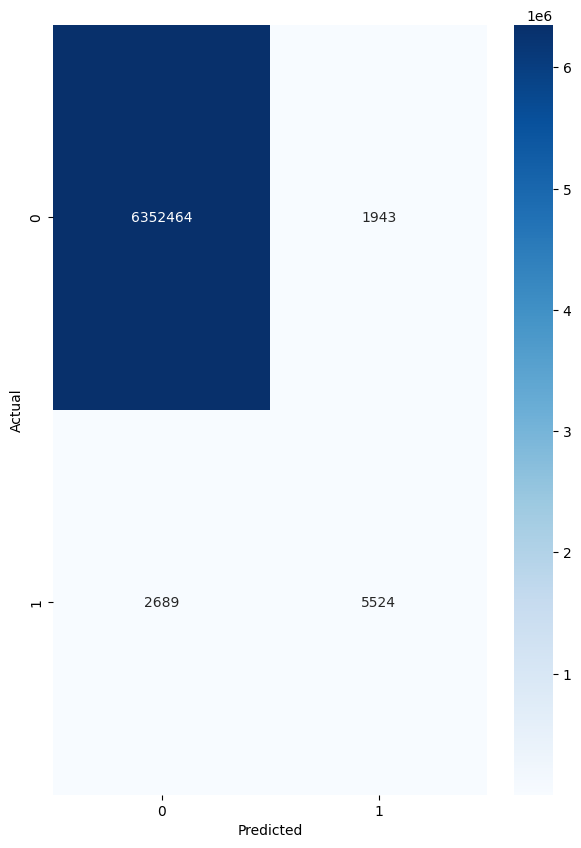

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(7,10))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')